<h3><center>Applied Data Mining</center></h3>
<h1><center>Lab 6: Anomaly Detection</h1>
<h3>Aung Naing Oo</h3><hr/>

The objective of this lab is to learn to perform anomaly detection using Jupyter Notebook.

#### A Boxplot and a Probablity Density Function Comparison **

<img src="lab2_data/boxplot_description.png" alt="Drawing" style="width: 500px;">
<img src="lab2_data/boxplot_description2.png" alt="Drawing" style="width: 500px;">

**  https://jingwen-z.github.io/what-is-box-plot/

### Task A (Graphical approach)
Import 'Stamps_01.csv' dataset. The data represents features of the forged stamps and the genuine ones. The color and printing qualities of the stamps are used for features extraction. Outliters are the forged stamps. The data is taken from the folowing URL

http://lapad-web.icmc.usp.br/repositories/outlier-evaluation/DAMI/semantic/Stamps/

> __Draw boxplots for variable D1 and D2.__

>1. How many outliers does D1 have? How many outliers does D2 have?
>1. What are Q1 and Q3 in D1 and D2?
>1. What are min, max, median in D1 and D2?
>1. Draw a scatter plot for D1 and D2.
>1. Can you easily recognize outliers in scatter plot?

Q1 : 0.047947000000000004
Q3 : 0.110009
Median : 0.075235
Minimum:  -0.04514599999999998 Maximum:  0.20310199999999998
Number of outliers: 14


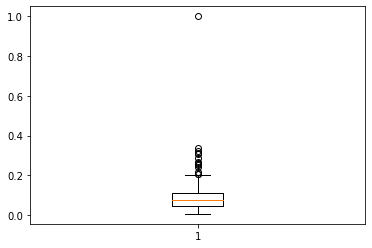

In [93]:
"""
Please, write your solution here.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('lab2_data/Stamps_01.csv')
data1 = df['data1']
plt.boxplot(data1)

q1 = np.quantile(data1, 0.25)
print("Q1 :",q1)

q3 = np.quantile(data1, 0.75)
print("Q3 :",q3)

median = np.median(data1)
print("Median :",median)

iqr = q3-q1

maximum = q3+(1.5*iqr)
minimum = q1-(1.5*iqr)
print("Minimum: ",minimum, "Maximum: ",maximum)

d1_outliers = data1[(data1 <= minimum) | (data1 >= maximum)]
print("Number of outliers:",len(d1_outliers))


Q1 : 0.339273
Q3 : 0.4369515
Median : 0.425226
Minimum:  0.19275525 Maximum:  0.58346925
Number of outliers: 101


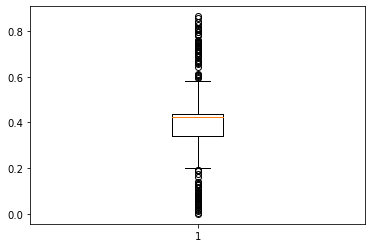

In [94]:
data2 = df['data2']
plt.boxplot(data2)

q1 = np.quantile(data2, 0.25)
print("Q1 :",q1)

q3 = np.quantile(data2, 0.75)
print("Q3 :",q3)

median = np.median(data2)
print("Median :",median)

iqr = q3-q1

maximum = q3+(1.5*iqr)
minimum = q1-(1.5*iqr)
print("Minimum: ",minimum, "Maximum: ",maximum)

d2_outliers = data2[(data2 <= minimum) | (data2 >= maximum)]
print("Number of outliers:",len(d2_outliers))

The outliers can be slightly recognized here based of cutting off in continuation of the diagonal line.


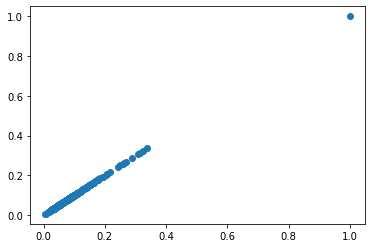

In [89]:
"""
Please, write your solution here.
"""
plt.scatter(data1,data1)
print("The outliers can be slightly recognized here based of cutting off in continuation of the diagonal line.")

The outliers for this plot is not recognisable at all from the scatter plot


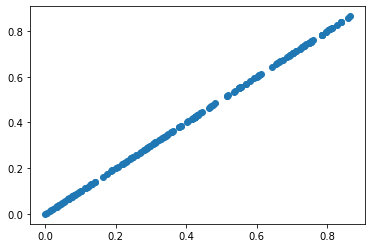

In [90]:
plt.scatter(data2,data2)
print("The outliers for this plot is not recognisable at all from the scatter plot")

### Task B (Local Outlier Factor - LOF)

You are going to use 'Stamps04' dataset.

>1. Perform a LOF analysis.
    - fitting the model
    - predicting the outliters and inliers
>1. Carry out a dimension reduction on the same data and extract the principal components. Carry out an LOF on the components and compare your results with the previous question.

In [91]:
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer
from pyod.utils.data import evaluate_print
df = pd.read_csv('lab2_data/Stamps_04.csv')
dfn = standardizer(df.drop('Labels',1))
clf = LOF(n_neighbors=3,contamination=1/25)
clf.fit(dfn)
df['AnomalyScore'] = clf.decision_scores_

"""
labels_ : int, either 0 or 1
        The binary labels of the training data. 0 stands for inliers
        and 1 for outliers/anomalies. It is generated by applying
        ``threshold_`` on ``decision_scores_``.

"""
df['AnomalyLabel'] = clf.labels_


_outliers = df['AnomalyLabel'] [ df['AnomalyLabel']  == 0]
_inliers = df['AnomalyLabel'] [ df['AnomalyLabel']  == 1]

print("Number of outliers:", len(_outliers))
print("Number of inliers:", len(_inliers))

Number of outliers: 312
Number of inliers: 13


In [92]:
from sklearn.decomposition import PCA

df = pd.read_csv('lab2_data/Stamps_04.csv')
dfn = standardizer(df.drop('Labels',1))
pca = PCA(n_components=3) #values tried from 1-9 for n_components
pca_fitted_X = pca.fit_transform(dfn)

clf = LOF(n_neighbors=3,contamination=1/25)
clf.fit(pca_fitted_X)
df['AnomalyScore'] = clf.decision_scores_

labels = clf.labels_


_outliers = labels[ labels  == 0]
_inliers = labels[ labels  == 1]

print("Number of outliers:", len(_outliers))
print("Number of inliers:", len(_inliers))

Number of outliers: 312
Number of inliers: 13


In [72]:
print("Makes no difference in terms of outliers and inliers after performing PCA")

Makes no difference in terms of outliers and inliers after performing PCA


<div class="alert alert-block alert-danger">

__IMPORTANT__ 

Please complete this Jupyter Notebook file and submit it to the Blackboard within __three weeks__ after this lab session. __Change the name of your notebook file__ to include  `first and last names` of you and your group mates, e.g. "`NameSurname_NameSurname.ipynb`".

</div>